In [ ]:
#

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

# customize our graphs for seasonailty 
import matplotlib.dates as mdates

from datetime import date

In [3]:
# seting seaborn style defaults

sns.set(rc={'figure.figsize':(11,4)})

# inporting data files

In [4]:
df = pd.read_csv('Data/Plant_1_Generation_Data.csv')

#df = pd.read_csv('Data/Plant_1_Generation_Data.csv', index_col=0, parse_dates=True)

In [5]:
df_w = pd.read_csv('Data/Plant_1_Weather_Sensor_Data.csv')

## Basic looks

In [8]:
#examining shape of plant generation file

df.shape

(68778, 7)

In [9]:
df.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [10]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [11]:
# checking data

df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


---

## Quick look @ Weather sensor data

In [12]:
df_w.shape

(3182, 6)

In [13]:
df_w.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
df_w.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [15]:
df_w.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [16]:
# head 

df_w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


---

---

## Conversions to Time Series

### Genorator data

In [27]:
# convert Data_time colum into datetime format 

df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

KeyError: 'DATE_TIME'

In [19]:
# Sets the 'date_time' column as index  

df.set_index('DATE_TIME', inplace=True)

In [20]:
df.index

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               ...
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=68778, freq=None)

In [21]:
# creates columns for year, month, week of week

df['year'] = df.index.year
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

In [22]:
# sort date time info

df.sort_index(inplace=True)

In [23]:
df.index.month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='DATE_TIME')

In [24]:
df.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek
DATE_TIME,,,,,,,,,
2020-01-06,4135001,1BY6WEcLGh8j5v7,0.0,0.0,829.0,6377931.0,2020,1,0
2020-01-06,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7242024.0,2020,1,0
2020-01-06,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6463239.0,2020,1,0
2020-01-06,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,1575.0,7133897.0,2020,1,0
2020-01-06,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6909405.0,2020,1,0


In [25]:
df.tail()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek
DATE_TIME,,,,,,,,,
2020-12-06 23:45:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,5900.0,7202086.0,2020,12,6
2020-12-06 23:45:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,5903.0,6398227.0,2020,12,6
2020-12-06 23:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0,2020,12,6
2020-12-06 23:45:00,4135001,bvBOhCH3iADSZry,0.0,0.0,2686.0,6509779.0,2020,12,6
2020-12-06 23:45:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,5794.0,7238780.0,2020,12,6


## Weather DataFrame 

In [28]:
# Convert data_time colum into datetime format

df_w['DATE_TIME'] = pd.to_datetime(df_w['DATE_TIME'])

In [29]:
# Set the date time column to index

df_w.set_index('DATE_TIME', inplace = True)

In [30]:
# creates columns for year, month, week of week

df_w['year'] = df_w.index.year
df_w['month'] = df_w.index.month
df_w['dayofweek'] = df_w.index.dayofweek

In [31]:
# Sort date and time info

df_w.sort_index(inplace=True)

In [32]:
df_w.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year,month,dayofweek
DATE_TIME,,,,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020,5,4
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020,5,4
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020,5,4
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020,5,4
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020,5,4


In [33]:
df_w.tail()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year,month,dayofweek
DATE_TIME,,,,,,,,
2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020,6,2
2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020,6,2
2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020,6,2
2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020,6,2
2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020,6,2


---

## Adjust Time Frame

In [35]:
"""
    df (Genorator) dataframe has 12 months and weather data has only ~ one month, 
    we are going to create a new df what has the same time frame
"""

df = df.loc['2020-05-15':'2020-06-17']

In [ ]:
## Graphs of Genorator 

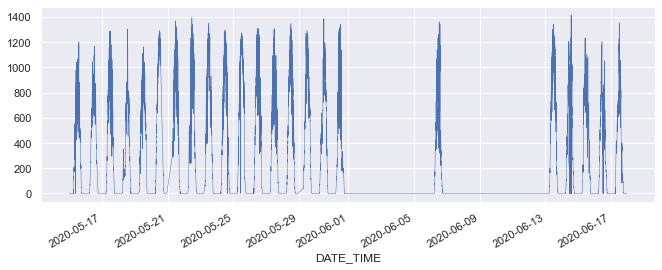

In [37]:
df['AC_POWER'].plot(linewidth=.5);

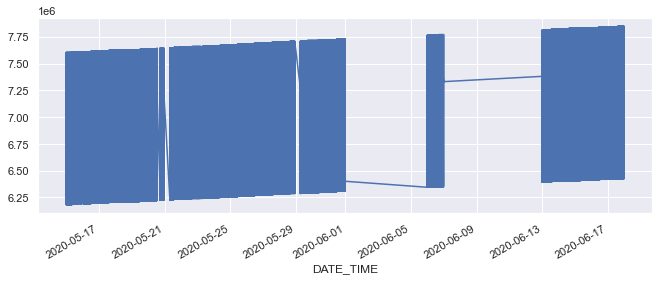

In [40]:
df['TOTAL_YIELD'].plot();

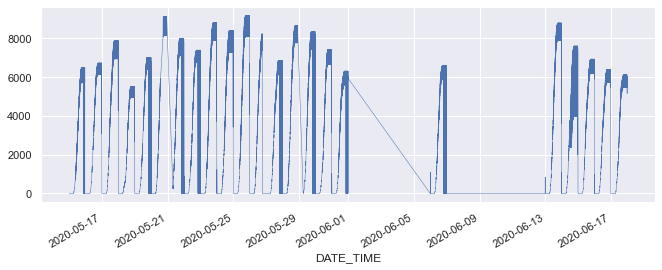

In [43]:
df['DAILY_YIELD'].plot(linewidth=.5);

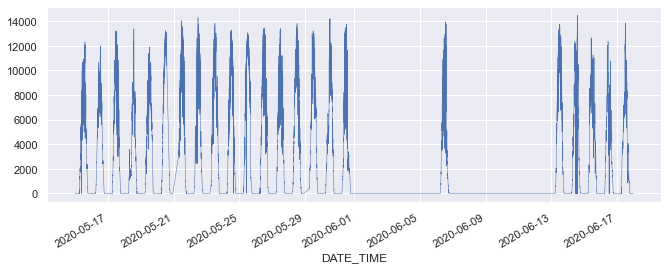

In [44]:
df['DC_POWER'].plot(linewidth=.5);

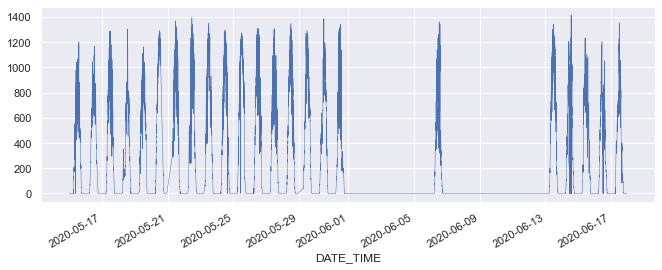

In [45]:
df['AC_POWER'].plot(linewidth=.5)

---

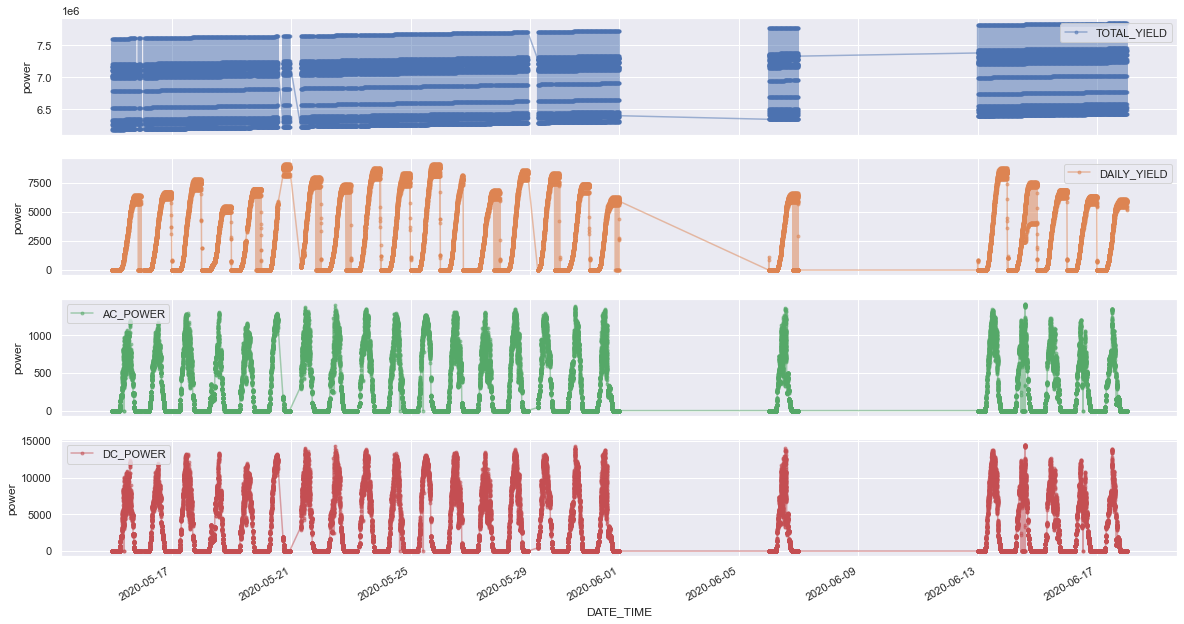

In [50]:
cols_plot = ['TOTAL_YIELD','DAILY_YIELD','AC_POWER','DC_POWER']


axes = df[cols_plot].plot(marker='.', alpha =.5, linestyle = None, figsize = (20,11), subplots = True)

for ax in axes:
    ax.set_ylabel('power');
    
    

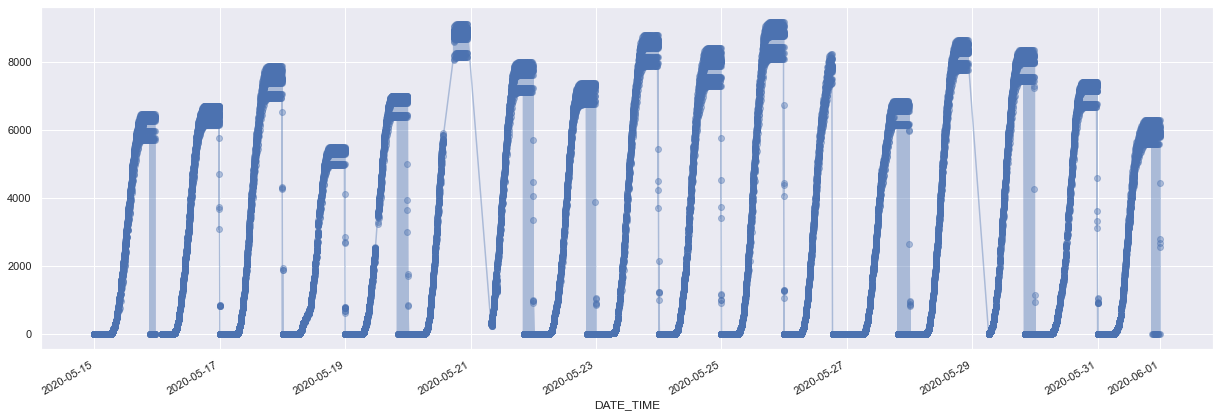

In [51]:
ax = df.loc['2020-05', 'DAILY_YIELD'].plot(marker = 'o', linestyle ='-', figsize = (21,7), alpha = .4)

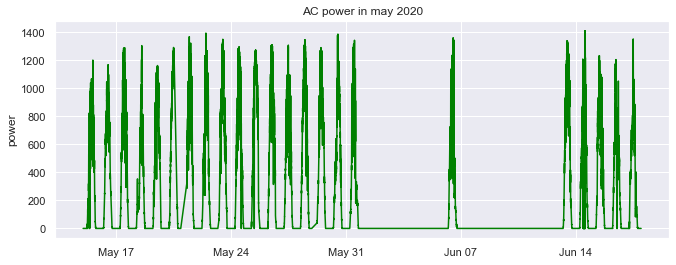

In [58]:
# ploting and labeling each SUNDAY

fig, ax = plt.subplots()

ax.plot(df['AC_POWER'], linestyle='-', color = 'green')
ax.set_ylabel('power')
ax.set_title('AC power in may 2020')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


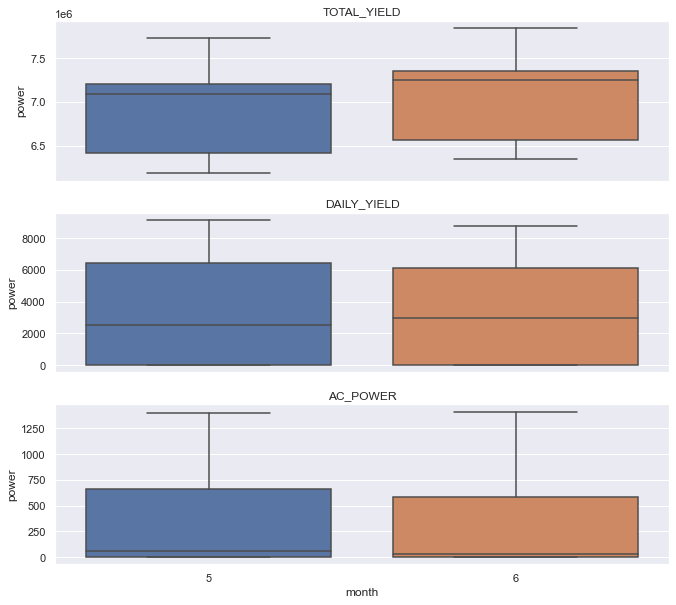

In [59]:
# Box plots for all columns for month column

fig, axes = plt.subplots(3, 1, figsize=(11,10), sharex=True)
for name, ax in zip(['TOTAL_YIELD','DAILY_YIELD','AC_POWER','DC_POWER'], axes):
    sns.boxplot(data= df, x = 'month', y=name, ax = ax)
    ax.set_ylabel('power')
    ax.set_title(name)
# Removes the automatic x-axis 
    if ax != axes[-1]:
        ax.set_xlabel('')

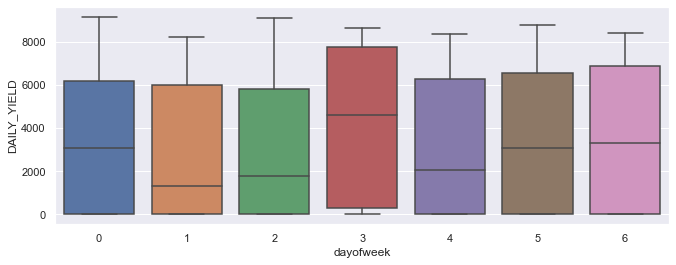

In [62]:
# Box plots days of the week showing yeilds

sns.boxplot(data=df, x= 'dayofweek', y = 'DAILY_YIELD');

---

### Weather 

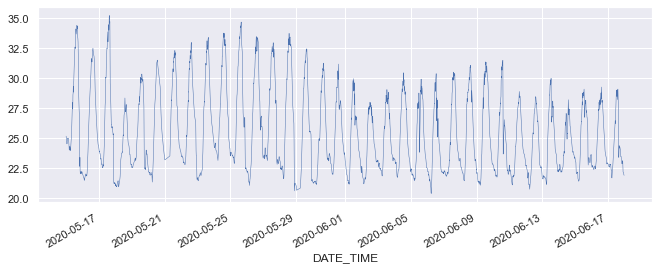

In [140]:
df_w['AMBIENT_TEMPERATURE'].plot(linewidth=.5);

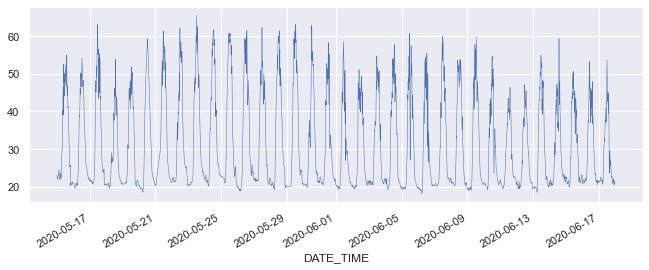

In [141]:
df_w['MODULE_TEMPERATURE'].plot(linewidth=.5);

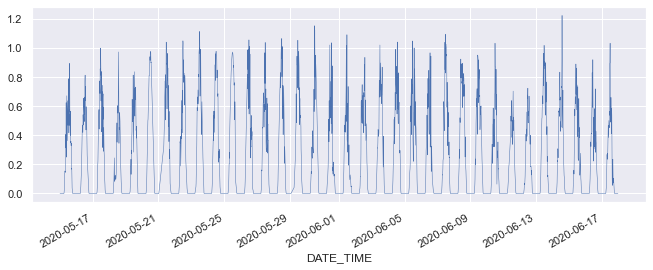

In [142]:
df_w['IRRADIATION'].plot(linewidth=.5);

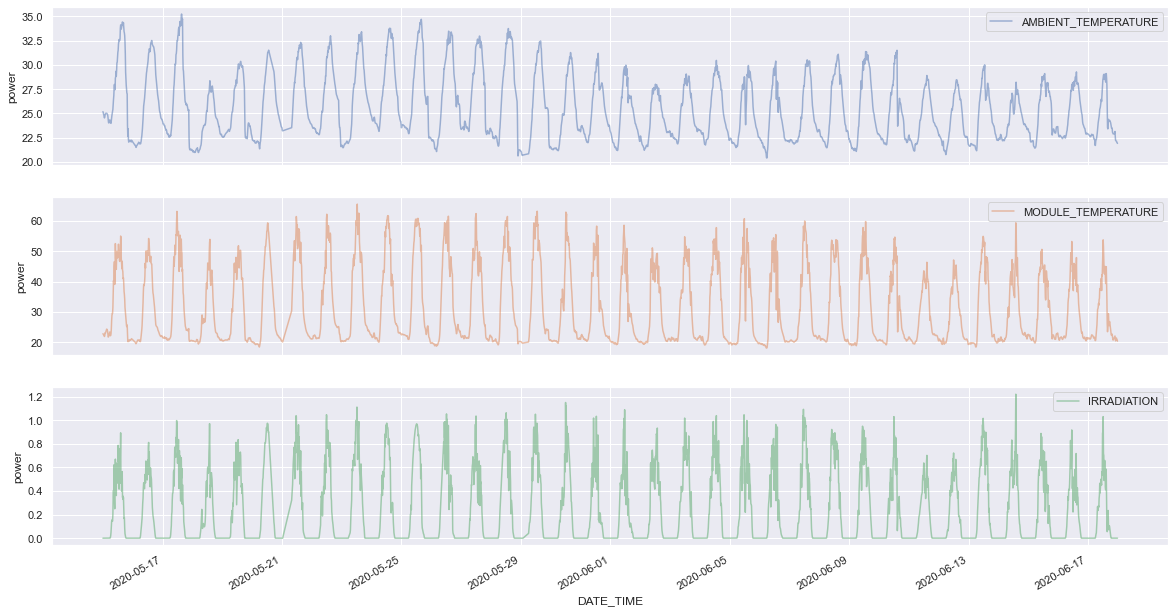

In [65]:
# Graphs of colums 

cols_plot_weather = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

axes = df_w[cols_plot_weather].plot(marker = None, alpha = .5, linestyle = None, figsize = (20,11), subplots = True)

for ax in axes:
    ax.set_ylabel('power');


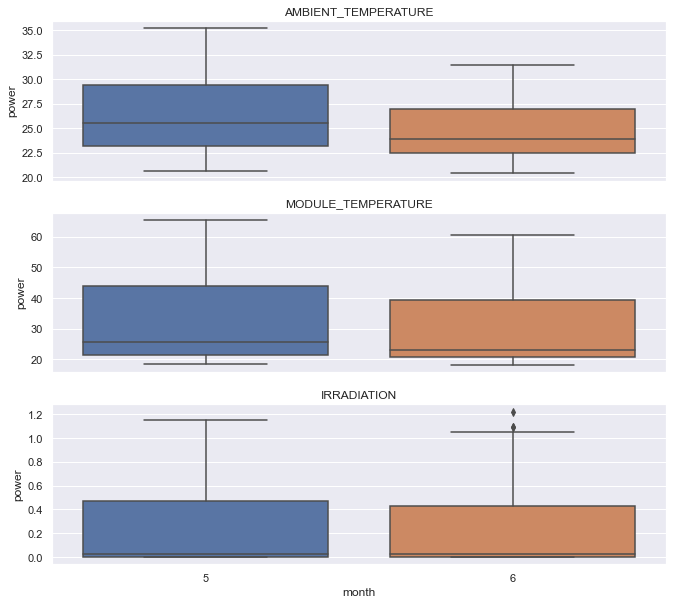

In [68]:
# box plot figures for weather 

fig, axes = plt.subplots(3,1, figsize=(11,10), sharex=True)
for name, ax in zip(cols_plot_weather, axes):
    sns.boxplot(data=df_w, x = 'month', y = name, ax = ax)
    ax.set_ylabel('power')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

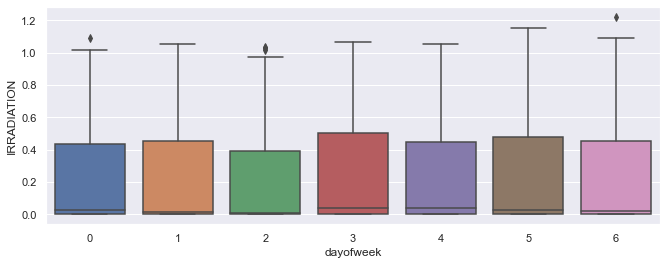

In [71]:
# Box plots days of the week showing IRRADIATION

sns.boxplot(data=df_w, x= 'dayofweek', y = 'IRRADIATION');

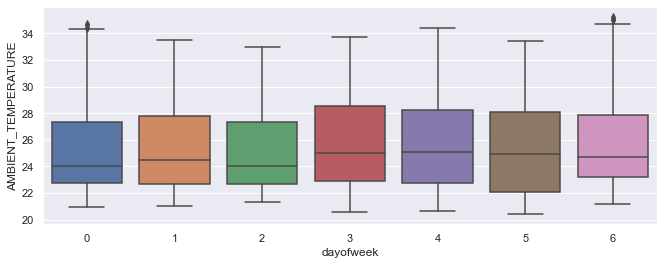

In [72]:
# Box plots days of the week showing AMBIENT_TEMPERATURE

sns.boxplot(data=df_w, x= 'dayofweek', y = 'AMBIENT_TEMPERATURE');

In [94]:
## Resample for days and merge

In [136]:
# Resampled df & df_W by day

df_resampled = df.resample('H').mean()
df_w_resampled = df_w.resample('H').mean()

In [137]:
# merge columns 
df_full = pd.merge(df_resampled, df_w_resampled, how='left', on=None, left_on=None, right_on=None,
                 left_index=True, right_index=True, sort=True,
                  copy=True, indicator=False,
                 validate=None)

# Drop columns
df_full = df_full.drop(['year_x','month_x','dayofweek_x', 'PLANT_ID_y', 'year_y', 'month_y', 'dayofweek_y', 'PLANT_ID_x'], axis =1)


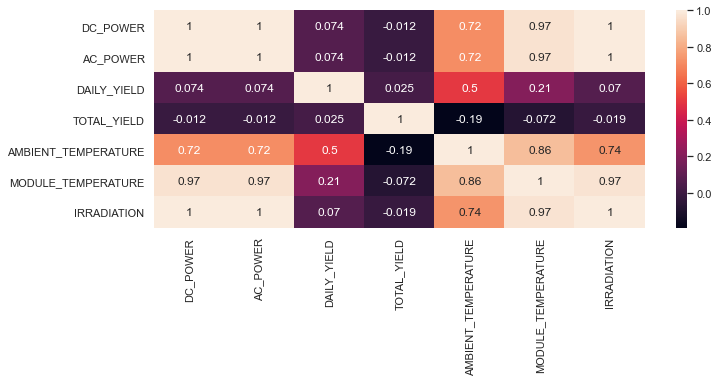

In [138]:
# heatMap of correlations 

sns.heatmap(df_full.corr(), annot = True);

--- 

## Normalizing data 

In [148]:
# new Dataframe of genorator to be normalized 

df_resampled_norm = df_resampled.drop(['PLANT_ID','TOTAL_YIELD','year','month','dayofweek'], axis = 1)
df_resampled_norm.head(2)

,DC_POWER,AC_POWER,DAILY_YIELD
DATE_TIME,,,
2020-05-15 00:00:00,0.0,0.0,0.0
2020-05-15 01:00:00,0.0,0.0,0.0


In [154]:
# Normalizing Genorator

scaler_g = MinMaxScaler(feature_range=(0,1))
scaler_g = scaler_g.fit(df_resampled_norm)
normalized_g = scaler_g.transform(df_resampled_norm)

In [159]:
# putting normalized data into dataframe 

df_resampled_norm = pd.DataFrame(normalized_g, index = df_resampled_norm.index, columns = df_resampled_norm.columns)
df_resampled_norm.sample(3)

In [153]:
# new Dataframe of weather to be normalized 

df_w_resampled_norm = df_w_resampled.drop(['PLANT_ID','year','month','dayofweek'], axis = 1)
df_w_resampled_norm.head(2)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-05-15 00:00:00,25.012697,22.643083,0.0
2020-05-15 01:00:00,24.667328,22.411960,0.0


In [163]:
# Normalizing weather

scaler_w = MinMaxScaler(feature_range=(0,1))
scaler_w = scaler_w.fit(df_w_resampled_norm)
normalized_w = scaler_w.transform(df_w_resampled_norm)

In [165]:
# putting normalized data into dataframe 

df_w_resampled_norm = pd.DataFrame(normalized_w, index = df_w_resampled_norm.index, columns = df_w_resampled_norm.columns)
df_w_resampled_norm.sample(3)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,
2020-06-09 07:00:00,0.182338,0.194737,0.216279
2020-05-18 13:00:00,0.465809,0.683627,0.758257
2020-06-07 13:00:00,0.650155,0.844832,0.820986


In [168]:
# Merging data

df_full_norm = pd.merge(df_resampled_norm, df_w_resampled_norm, how='left', on=None, left_on=None, right_on=None,
                      left_index=True, right_index=True, sort=True,
                      copy=True, indicator=False,
                      validate=None)


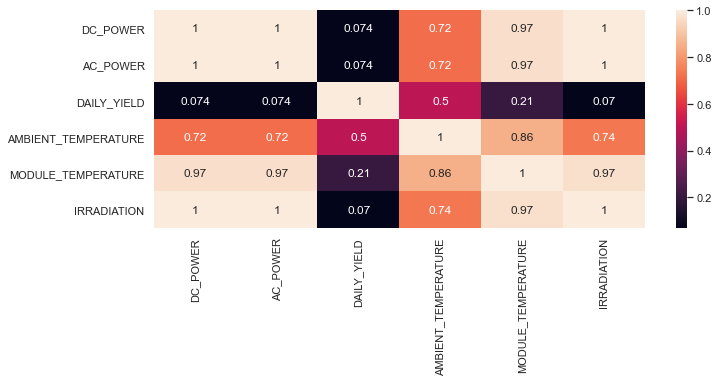

In [225]:
sns.heatmap(df_full_norm.corr(), annot = True);

(array([737562., 737566., 737570., 737574., 737577., 737581., 737585.,
        737589., 737593.]),
 <a list of 9 Text major ticklabel objects>)

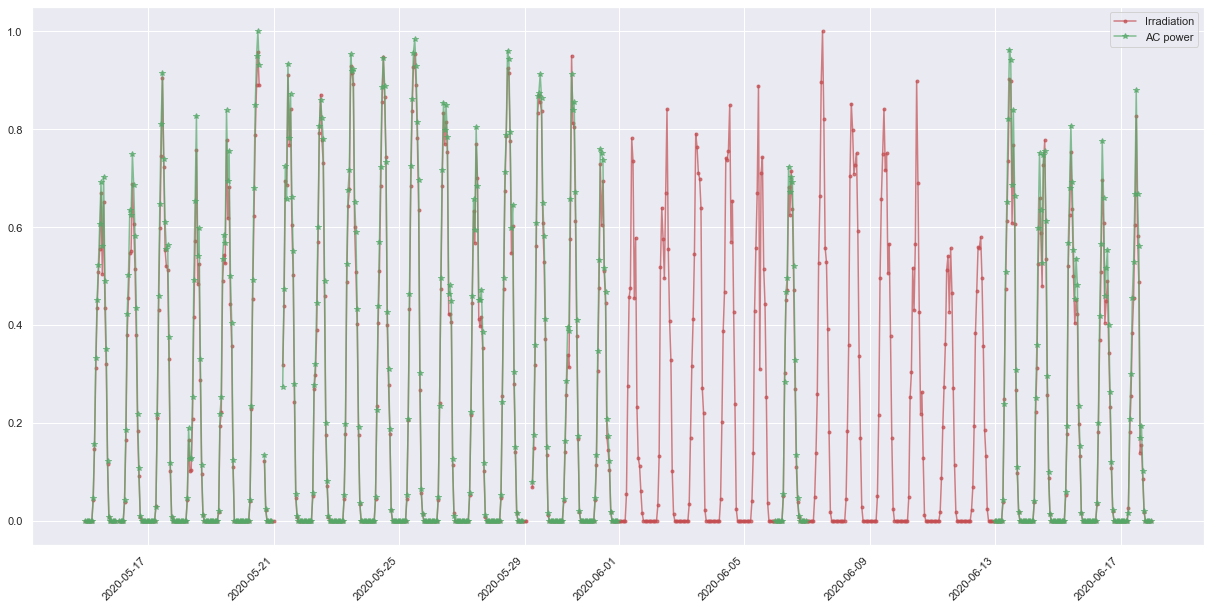

In [223]:

#plt.figure(figsize = (21,11))
#df_full_norm2 = df_full_norm.reset_index()
plt.figure(figsize = (21,11))
#plt.plot('DAILY_YIELD', data = df_full_norm, alpha = .8, label = 'Daily Yeild')
plt.plot('IRRADIATION', data = df_full_norm, marker = '.' ,c= 'r',alpha = .7,label ='Irradiation')
#plt.plot('AMBIENT_TEMPERATURE', data = df_full_norm, label ='Amdient temperature')
plt.plot('AC_POWER', data = df_full_norm, marker = '*',alpha = .7, color = 'g',label ='AC power')
plt.legend(loc = 'best')
plt.gcf().autofmt_xdate();
plt.xticks( rotation=45)

(array([737562., 737566., 737570., 737574., 737577., 737581., 737585.,
        737589., 737593.]),
 <a list of 9 Text major ticklabel objects>)

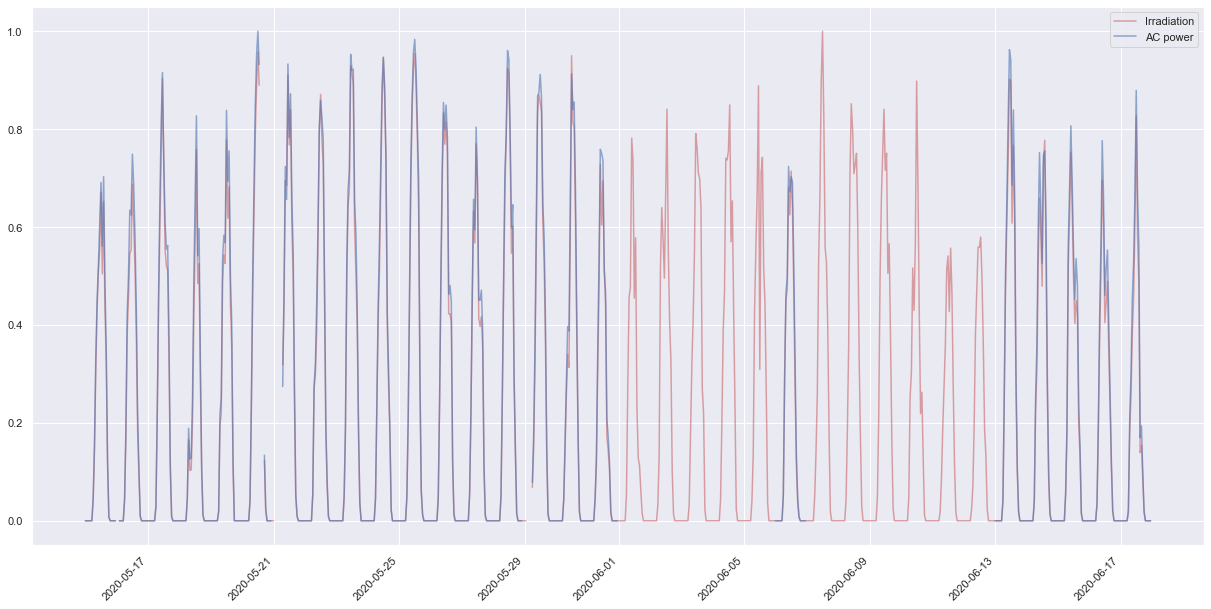

In [229]:

#plt.figure(figsize = (21,11))
#df_full_norm2 = df_full_norm.reset_index()
plt.figure(figsize = (21,11))
#plt.plot('DAILY_YIELD', data = df_full_norm, alpha = .8, label = 'Daily Yeild')
plt.plot('IRRADIATION', data = df_full_norm, c= 'r',alpha = .5,label ='Irradiation')
#plt.plot('AMBIENT_TEMPERATURE', data = df_full_norm, label ='Amdient temperature')
plt.plot('AC_POWER', data = df_full_norm, alpha = .6,label ='AC power')
plt.legend(loc = 'best')
plt.gcf().autofmt_xdate();
plt.xticks( rotation=45)


(array([441528, 441936, 442343]), <a list of 3 Text major ticklabel objects>)

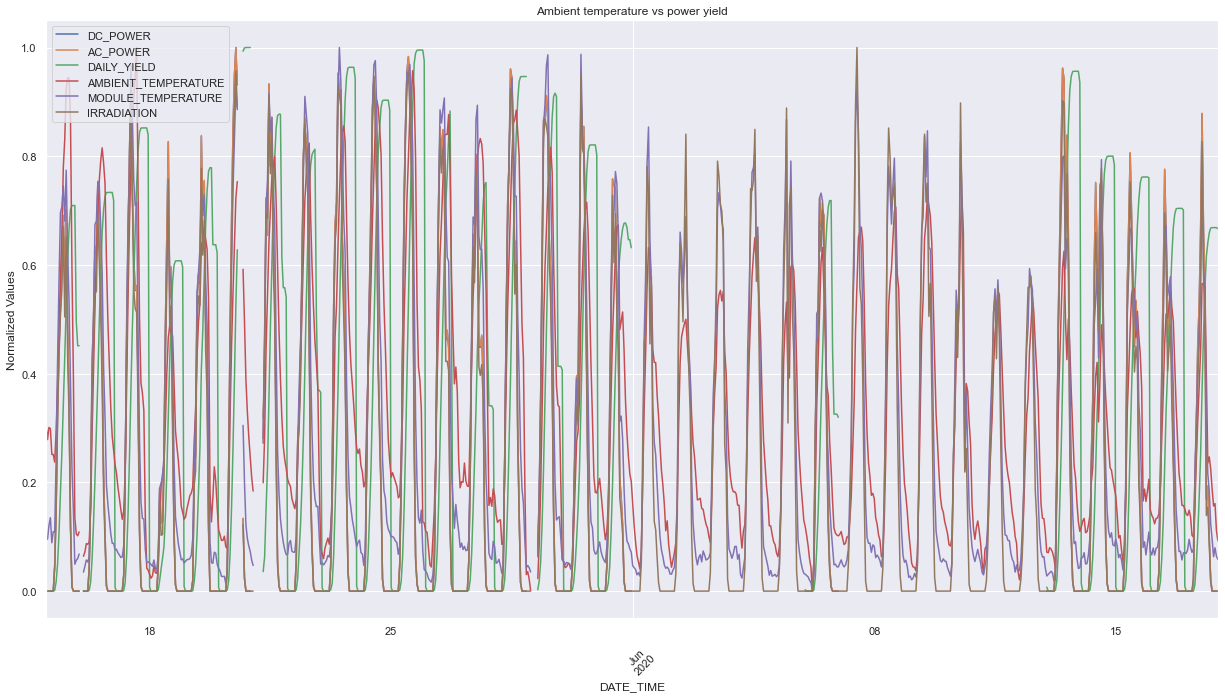

In [176]:

df_full_norm.plot( figsize = (21,11))
plt.title('Ambient temperature vs power yield')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45);


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

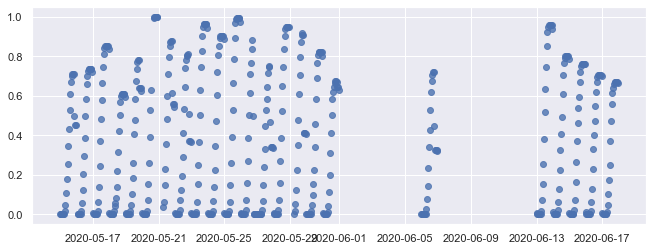

In [170]:
sns.regplot(data = df_full_norm.reset_index(), x = 'DATE_TIME', y = 'DAILY_YIELD')

In [169]:
df_full_norm

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,
2020-05-15 00:00:00,0.0,0.0,0.000000,0.302930,0.100711,0.0
2020-05-15 01:00:00,0.0,0.0,0.000000,0.278799,0.095360,0.0
2020-05-15 02:00:00,0.0,0.0,0.000000,0.301123,0.120826,0.0
2020-05-15 03:00:00,0.0,0.0,0.000000,0.298870,0.135048,0.0
2020-05-15 04:00:00,0.0,0.0,0.000000,0.251503,0.088905,0.0
...,...,...,...,...,...,...
2020-06-17 19:00:00,0.0,0.0,0.668685,0.187997,0.095501,0.0
2020-06-17 20:00:00,0.0,0.0,0.668685,0.156588,0.063251,0.0
2020-06-17 21:00:00,0.0,0.0,0.668685,0.161010,0.079702,0.0


In [145]:
df_resampled = df.resample('H').mean()
df_w_resampled = df_w.resample('H').mean()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,,,
2020-05-15 00:00:00,0.0,0.0,0.0,6.837223e+06,25.012697,22.643083,0.0
2020-05-15 01:00:00,0.0,0.0,0.0,6.845193e+06,24.667328,22.411960,0.0


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

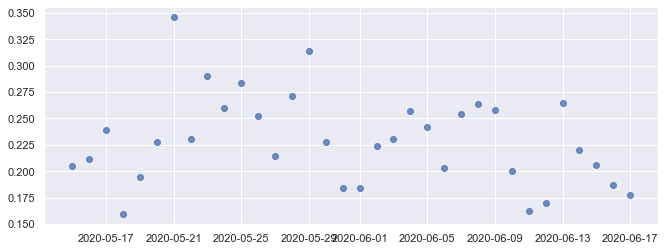

In [101]:
sns.regplot(data = df_full.reset_index(), x = 'DATE_TIME', y = 'IRRADIATION')

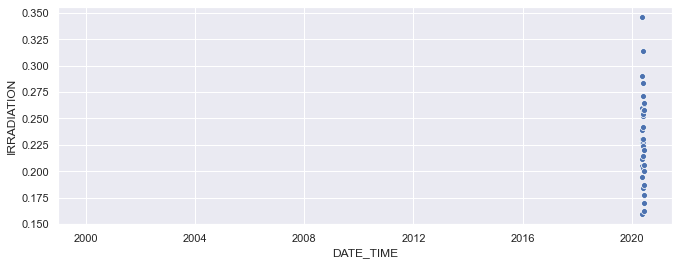

In [102]:
sns.scatterplot(data = df_full.reset_index(), x='DATE_TIME', y='IRRADIATION')

In [93]:
df_full.head()

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year_x,month_x,dayofweek_x,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year_y,month_y,dayofweek_y
DATE_TIME,,,,,,,,,,,,,,,
2020-05-15,4135001.0,2879.856266,281.899160,2586.279926,6.856087e+06,2020.0,5.0,4.0,4135001,27.430823,32.582964,0.204699,2020,5,4
2020-05-16,4135001.0,3002.139358,293.877881,3464.273323,6.863167e+06,2020.0,5.0,5.0,4135001,26.780538,31.858851,0.211951,2020,5,5
2020-05-17,4135001.0,3200.565600,312.961832,3695.106669,6.869208e+06,2020.0,5.0,6.0,4135001,26.686727,32.740435,0.238869,2020,5,6
2020-05-18,4135001.0,2278.668814,222.997021,2429.114465,6.875446e+06,2020.0,5.0,0.0,4135001,23.850938,27.814344,0.159026,2020,5,0
2020-05-19,4135001.0,2732.640629,267.462558,2962.975236,6.888140e+06,2020.0,5.0,1.0,4135001,25.338021,29.725163,0.194031,2020,5,1


In [75]:
df.index

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               ...
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=45680, freq=None)

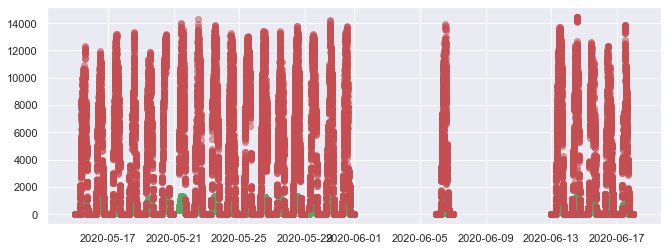

In [80]:
plt.scatter(df.index, df['AC_POWER'], c="g", alpha=0.5, marker=None, label="Luck")
plt.scatter(df.index, df['DC_POWER'], c="r", alpha=0.5, marker=None, label="Luck")

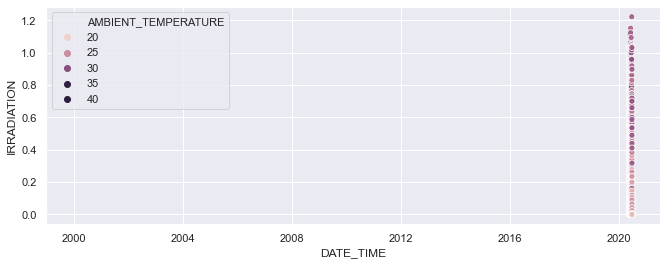

In [82]:
sns.scatterplot(x=df_w.index, y=df_w['IRRADIATION'], hue=df_w['AMBIENT_TEMPERATURE'])

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

In [63]:
df_w.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year,month,dayofweek
DATE_TIME,,,,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020,5,4
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020,5,4
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020,5,4
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020,5,4
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020,5,4


In [ ]:
df.loc[(df.index >= '2020-01-01') & (df.index <= '2020-02-01')].count()

In [144]:
df_w.tail()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,year,month,dayofweek
DATE_TIME,,,,,,,,
2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020,6,2
2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020,6,2
2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020,6,2
2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020,6,2
2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020,6,2
